<a href="https://colab.research.google.com/github/santiagonajera/S-OP-AI/blob/main/SOP_UPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
import requests

# URL del archivo Excel
url = "https://github.com/santiagonajera/S-OP-AI/raw/refs/heads/main/demanda_60_productos.xlsx"

# Paso 1: Cargar la data desde el repositorio GitHub
response = requests.get(url)
with open("demanda_60_productos.xlsx", "wb") as file:
    file.write(response.content)

# Leer la hoja "HistoricoVenta"
df = pd.read_excel("demanda_60_productos.xlsx", sheet_name="HistoricoVenta")

# Paso 2: Preprocesamiento de la data
# Convertir la columna de fechas al formato datetime
df["Fecha"] = pd.to_datetime(df["Fecha"])

# Seleccionar una columna de demanda (por ejemplo, P001) para proyectar
producto_seleccionado = "P001"
data_producto = df[["Fecha", producto_seleccionado]]

# Renombrar columnas para que sean compatibles con Prophet
data_producto.columns = ["ds", "y"]

# Agrupar la demanda semanal en mensual (sumando la demanda de cada mes)
data_mensual = data_producto.set_index("ds").resample("M").sum().reset_index()

# Paso 3: Entrenar el modelo Prophet
model = Prophet()
model.fit(data_mensual)

# Paso 4: Proyectar la demanda para los próximos 12 meses
future = model.make_future_dataframe(periods=12, freq="M")
forecast = model.predict(future)

# Paso 5: Visualización
# Graficar la demanda histórica y las proyecciones
fig = model.plot(forecast, xlabel="Fecha", ylabel="Demanda")
plt.title(f"Proyección de Demanda para {producto_seleccionado}")
plt.show()

# Mostrar componentes de la proyección (tendencia, estacionalidad, etc.)
fig_components = model.plot_components(forecast)
plt.show()

# Guardar las proyecciones en un DataFrame
proyecciones = forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]]
print(proyecciones.tail(12))  # Mostrar las proyecciones para los próximos 12 meses

KeyError: 'Fecha'

Nombres de las columnas:
Index(['Unnamed: 0', 'P001', 'P002', 'P003', 'P004', 'P005', 'P006', 'P007',
       'P008', 'P009', 'P010', 'P011', 'P012', 'P013', 'P014', 'P015', 'P016',
       'P017', 'P018', 'P019', 'P020', 'P021', 'P022', 'P023', 'P024', 'P025',
       'P026', 'P027', 'P028', 'P029', 'P030', 'P031', 'P032', 'P033', 'P034',
       'P035', 'P036', 'P037', 'P038', 'P039', 'P040', 'P041', 'P042', 'P043',
       'P044', 'P045', 'P046', 'P047', 'P048', 'P049', 'P050', 'P051', 'P052',
       'P053', 'P054', 'P055', 'P056', 'P057', 'P058', 'P059', 'P060'],
      dtype='object')

Primeras filas del DataFrame:
  Unnamed: 0  P001  P002  P003  P004  P005  P006  P007  P008  P009  ...  P051  \
0 2023-01-01   115    90    97   113    97    96    89   108   103  ...   107   
1 2023-01-08   124    99    98   133    97    89   106   121   104  ...   104   
2 2023-01-15   122    95    97   122   105    93   115   118   103  ...   106   
3 2023-01-22   123    92    96   122   104    93   113

<ipython-input-2-2e792a3c8e7a>:43: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_mensual = data_producto.set_index("ds").resample("M").sum().reset_index()
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 20.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfunxk6e0/3_mfj6ub.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfunxk6e0/ukf6wjy8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90586', 'data', 'file=/tmp/tmpfunxk6e0/3_mfj6ub.json', 'init=/tmp/tmpfunxk6e0/ukf6wjy8.json', 'output', 'file=/tmp/tmpfunxk6e0/prophet_model9rhduwyz/prophet_model-20250327000106.csv'

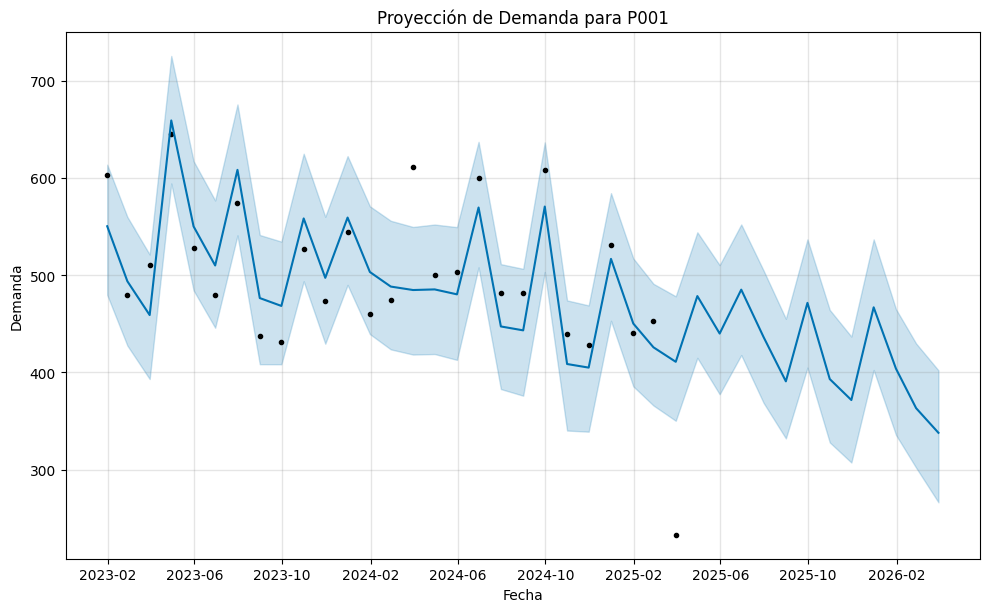

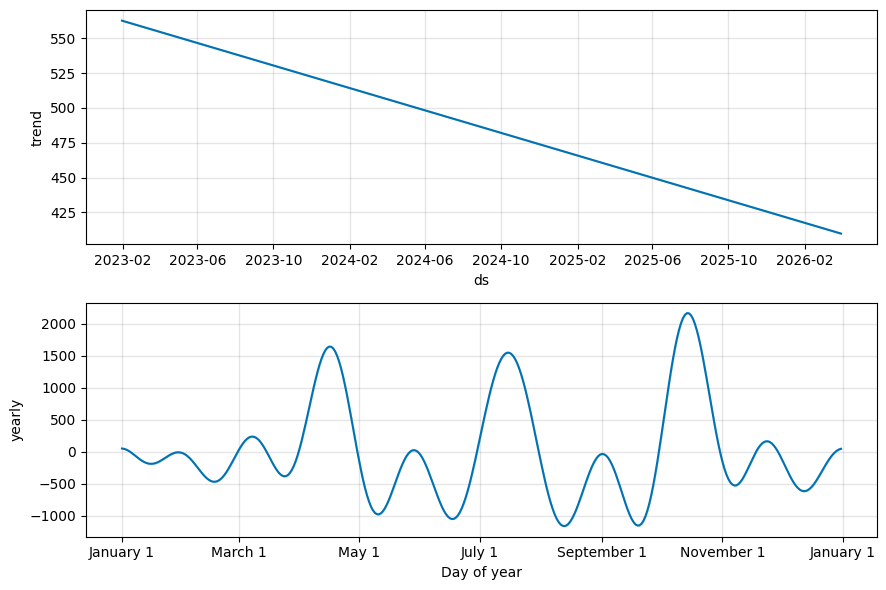

           ds        yhat  yhat_lower  yhat_upper
27 2025-04-30  478.646989  415.056913  544.304966
28 2025-05-31  440.081120  377.586028  510.492884
29 2025-06-30  485.257545  417.960982  552.359167
30 2025-07-31  436.502588  368.790037  504.956957
31 2025-08-31  390.890552  332.179268  455.288681
32 2025-09-30  471.648150  405.001933  537.018961
33 2025-10-31  393.229925  328.027020  464.396573
34 2025-11-30  371.663171  307.363731  436.964196
35 2025-12-31  467.059506  402.575494  536.988615
36 2026-01-31  403.931897  335.731704  465.163649
37 2026-02-28  363.278058  302.012448  429.845078
38 2026-03-31  337.939677  266.388992  402.236803


In [2]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
import requests

# URL del archivo Excel
url = "https://github.com/santiagonajera/S-OP-AI/raw/refs/heads/main/demanda_60_productos.xlsx"

# Paso 1: Cargar la data desde el repositorio GitHub
response = requests.get(url)
with open("demanda_60_productos.xlsx", "wb") as file:
    file.write(response.content)

# Leer la hoja "HistoricoVenta"
df = pd.read_excel("demanda_60_productos.xlsx", sheet_name="HistoricoVenta")

# Verificar los nombres de las columnas
print("Nombres de las columnas:")
print(df.columns)

# Verificar las primeras filas del DataFrame
print("\nPrimeras filas del DataFrame:")
print(df.head())

# Paso 2: Preprocesamiento de la data
# Identificar el nombre real de la columna de fechas
# Si la columna de fechas no se llama "Fecha", actualizar el nombre aquí
nombre_columna_fecha = df.columns[0]  # Suponemos que la primera columna es la de fechas

# Convertir la columna de fechas al formato datetime
df[nombre_columna_fecha] = pd.to_datetime(df[nombre_columna_fecha])

# Seleccionar una columna de demanda (por ejemplo, P001) para proyectar
producto_seleccionado = "P001"
data_producto = df[[nombre_columna_fecha, producto_seleccionado]]

# Renombrar columnas para que sean compatibles con Prophet
data_producto.columns = ["ds", "y"]

# Agrupar la demanda semanal en mensual (sumando la demanda de cada mes)
data_mensual = data_producto.set_index("ds").resample("M").sum().reset_index()

# Paso 3: Entrenar el modelo Prophet
model = Prophet()
model.fit(data_mensual)

# Paso 4: Proyectar la demanda para los próximos 12 meses
future = model.make_future_dataframe(periods=12, freq="M")
forecast = model.predict(future)

# Paso 5: Visualización
# Graficar la demanda histórica y las proyecciones
fig = model.plot(forecast, xlabel="Fecha", ylabel="Demanda")
plt.title(f"Proyección de Demanda para {producto_seleccionado}")
plt.show()

# Mostrar componentes de la proyección (tendencia, estacionalidad, etc.)
fig_components = model.plot_components(forecast)
plt.show()

# Guardar las proyecciones en un DataFrame
proyecciones = forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]]
print(proyecciones.tail(12))  # Mostrar las proyecciones para los próximos 12 meses

<ipython-input-3-cb5ad20aca53>:42: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_mensual = data_producto.set_index("ds").resample("M").sum().reset_index()
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 20.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfunxk6e0/2tpje859.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfunxk6e0/ujt26nep.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70593', 'data', 'file=/tmp/tmpfunxk6e0/2tpje859.json', 'init=/tmp/tmpfunxk6e0/ujt26nep.json', 'output', 'file=/tmp/tmpfunxk6e0/prophet_modelhco9vqw0/prophet_model-20250327000614.csv'

Nombres de las columnas:
Index(['Unnamed: 0', 'P001', 'P002', 'P003', 'P004', 'P005', 'P006', 'P007',
       'P008', 'P009', 'P010', 'P011', 'P012', 'P013', 'P014', 'P015', 'P016',
       'P017', 'P018', 'P019', 'P020', 'P021', 'P022', 'P023', 'P024', 'P025',
       'P026', 'P027', 'P028', 'P029', 'P030', 'P031', 'P032', 'P033', 'P034',
       'P035', 'P036', 'P037', 'P038', 'P039', 'P040', 'P041', 'P042', 'P043',
       'P044', 'P045', 'P046', 'P047', 'P048', 'P049', 'P050', 'P051', 'P052',
       'P053', 'P054', 'P055', 'P056', 'P057', 'P058', 'P059', 'P060'],
      dtype='object')

Primeras filas del DataFrame:
  Unnamed: 0  P001  P002  P003  P004  P005  P006  P007  P008  P009  ...  P051  \
0 2023-01-01   115    90    97   113    97    96    89   108   103  ...   107   
1 2023-01-08   124    99    98   133    97    89   106   121   104  ...   104   
2 2023-01-15   122    95    97   122   105    93   115   118   103  ...   106   
3 2023-01-22   123    92    96   122   104    93   113

00:06:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


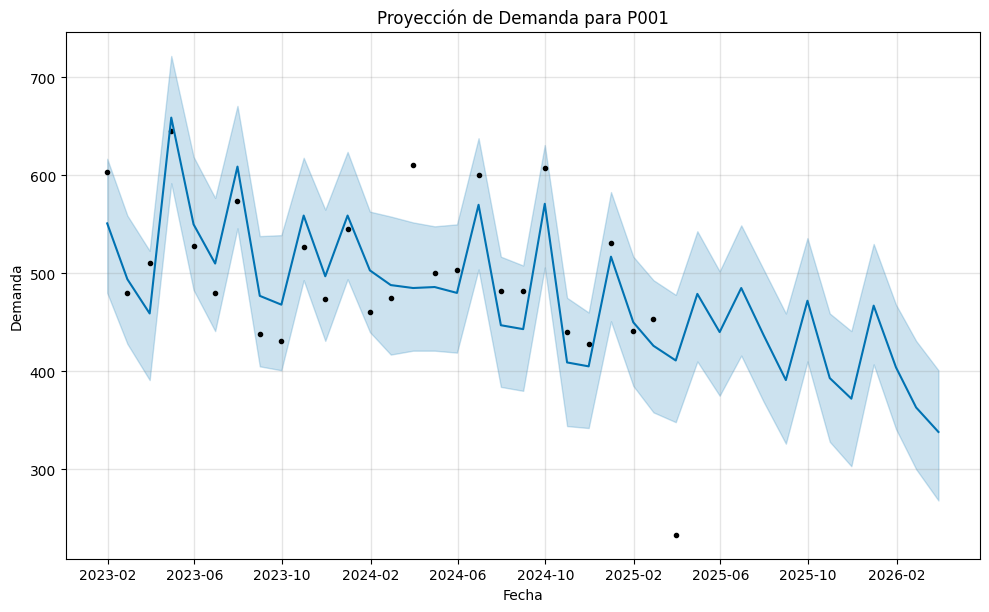

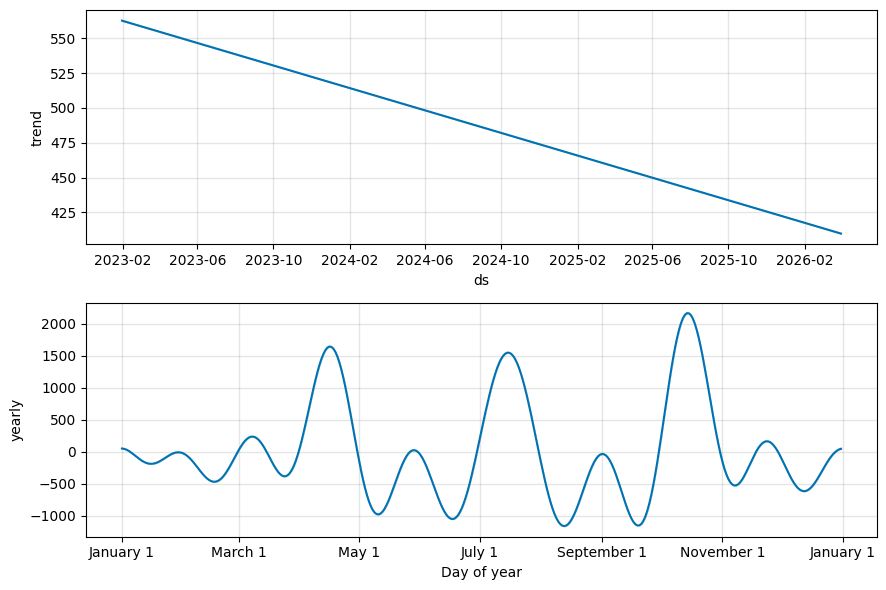

           ds  yhat  yhat_lower  yhat_upper
27 2025-04-30   479         410         543
28 2025-05-31   440         375         502
29 2025-06-30   485         416         549
30 2025-07-31   437         369         504
31 2025-08-31   391         326         459
32 2025-09-30   472         410         536
33 2025-10-31   393         328         459
34 2025-11-30   372         303         441
35 2025-12-31   467         407         530
36 2026-01-31   404         341         468
37 2026-02-28   363         300         431
38 2026-03-31   338         268         401


In [3]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
import requests

# URL del archivo Excel
url = "https://github.com/santiagonajera/S-OP-AI/raw/refs/heads/main/demanda_60_productos.xlsx"

# Paso 1: Cargar la data desde el repositorio GitHub
response = requests.get(url)
with open("demanda_60_productos.xlsx", "wb") as file:
    file.write(response.content)

# Leer la hoja "HistoricoVenta"
df = pd.read_excel("demanda_60_productos.xlsx", sheet_name="HistoricoVenta")

# Verificar los nombres de las columnas
print("Nombres de las columnas:")
print(df.columns)

# Verificar las primeras filas del DataFrame
print("\nPrimeras filas del DataFrame:")
print(df.head())

# Paso 2: Preprocesamiento de la data
# Identificar el nombre real de la columna de fechas
nombre_columna_fecha = df.columns[0]  # Suponemos que la primera columna es la de fechas

# Convertir la columna de fechas al formato datetime
df[nombre_columna_fecha] = pd.to_datetime(df[nombre_columna_fecha])

# Seleccionar una columna de demanda (por ejemplo, P001) para proyectar
producto_seleccionado = "P001"
data_producto = df[[nombre_columna_fecha, producto_seleccionado]]

# Renombrar columnas para que sean compatibles con Prophet
data_producto.columns = ["ds", "y"]

# Agrupar la demanda semanal en mensual (sumando la demanda de cada mes)
data_mensual = data_producto.set_index("ds").resample("M").sum().reset_index()

# Paso 3: Entrenar el modelo Prophet
model = Prophet()
model.fit(data_mensual)

# Paso 4: Proyectar la demanda para los próximos 12 meses
future = model.make_future_dataframe(periods=12, freq="M")
forecast = model.predict(future)

# Redondear las proyecciones al entero más cercano
forecast['yhat'] = forecast['yhat'].round(0).astype(int)
forecast['yhat_lower'] = forecast['yhat_lower'].round(0).astype(int)
forecast['yhat_upper'] = forecast['yhat_upper'].round(0).astype(int)

# Paso 5: Visualización
# Graficar la demanda histórica y las proyecciones
fig = model.plot(forecast, xlabel="Fecha", ylabel="Demanda")
plt.title(f"Proyección de Demanda para {producto_seleccionado}")
plt.show()

# Mostrar componentes de la proyección (tendencia, estacionalidad, etc.)
fig_components = model.plot_components(forecast)
plt.show()

# Guardar las proyecciones en un DataFrame
proyecciones = forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]]
print(proyecciones.tail(12))  # Mostrar las proyecciones para los próximos 12 meses

<ipython-input-4-525d795b9b1f>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_producto["y"] = data_producto["y"].apply(lambda x: max(x, 0))
<ipython-input-4-525d795b9b1f>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_producto["y"] = data_producto["y"].apply(lambda x: max(min(x, limite_superior), limite_inferior))
<ipython-input-4-525d795b9b1f>:58: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_mensual = data_producto.set_index("ds")

Nombres de las columnas:
Index(['Unnamed: 0', 'P001', 'P002', 'P003', 'P004', 'P005', 'P006', 'P007',
       'P008', 'P009', 'P010', 'P011', 'P012', 'P013', 'P014', 'P015', 'P016',
       'P017', 'P018', 'P019', 'P020', 'P021', 'P022', 'P023', 'P024', 'P025',
       'P026', 'P027', 'P028', 'P029', 'P030', 'P031', 'P032', 'P033', 'P034',
       'P035', 'P036', 'P037', 'P038', 'P039', 'P040', 'P041', 'P042', 'P043',
       'P044', 'P045', 'P046', 'P047', 'P048', 'P049', 'P050', 'P051', 'P052',
       'P053', 'P054', 'P055', 'P056', 'P057', 'P058', 'P059', 'P060'],
      dtype='object')

Primeras filas del DataFrame:
  Unnamed: 0  P001  P002  P003  P004  P005  P006  P007  P008  P009  ...  P051  \
0 2023-01-01   115    90    97   113    97    96    89   108   103  ...   107   
1 2023-01-08   124    99    98   133    97    89   106   121   104  ...   104   
2 2023-01-15   122    95    97   122   105    93   115   118   103  ...   106   
3 2023-01-22   123    92    96   122   104    93   113

00:11:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


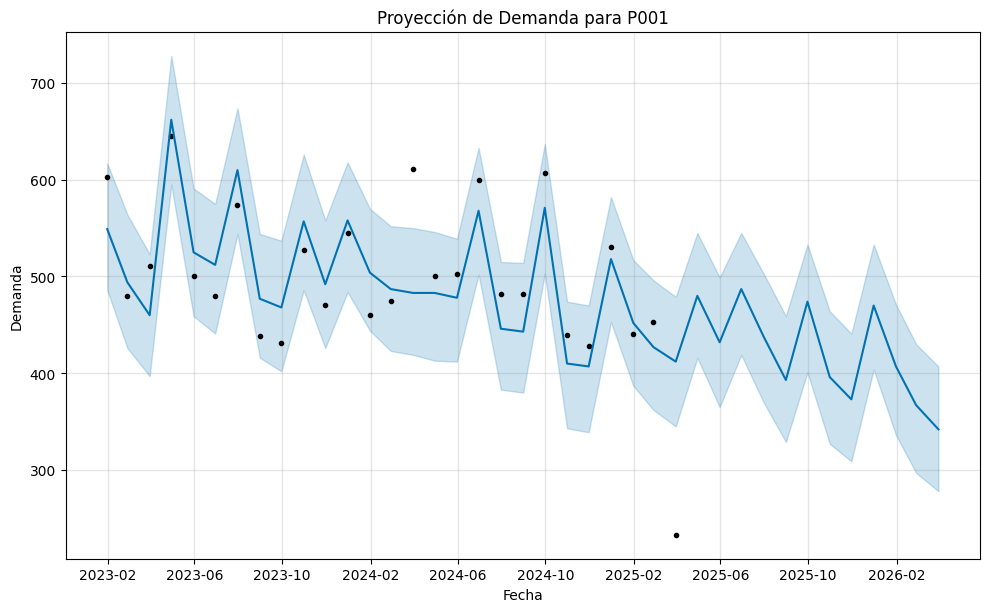

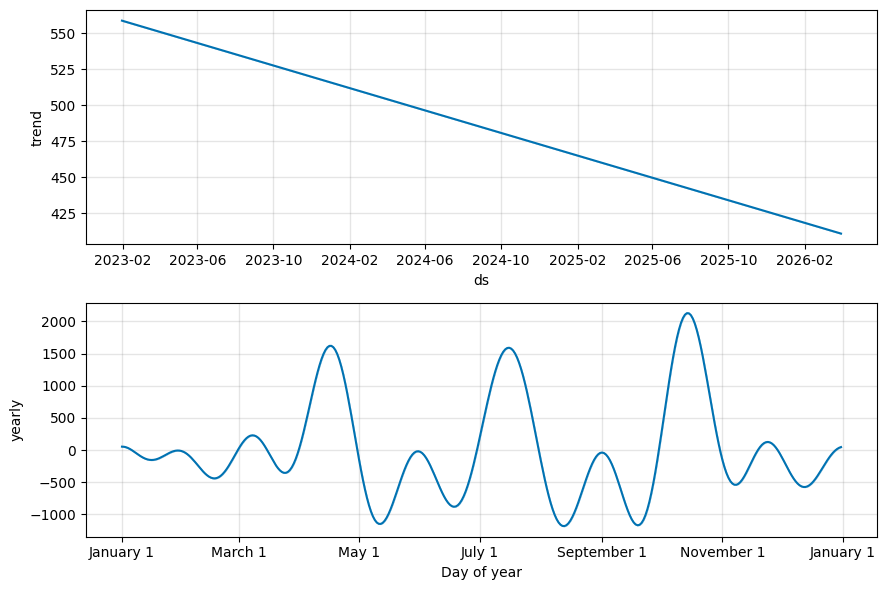

           ds  yhat  yhat_lower  yhat_upper
27 2025-04-30   480         416         545
28 2025-05-31   432         365         499
29 2025-06-30   487         419         545
30 2025-07-31   438         370         503
31 2025-08-31   393         329         459
32 2025-09-30   474         401         533
33 2025-10-31   396         327         464
34 2025-11-30   373         309         441
35 2025-12-31   470         404         533
36 2026-01-31   407         336         471
37 2026-02-28   367         297         430
38 2026-03-31   342         278         407


In [4]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
import requests

# URL del archivo Excel
url = "https://github.com/santiagonajera/S-OP-AI/raw/refs/heads/main/demanda_60_productos.xlsx"

# Paso 1: Cargar la data desde el repositorio GitHub
response = requests.get(url)
with open("demanda_60_productos.xlsx", "wb") as file:
    file.write(response.content)

# Leer la hoja "HistoricoVenta"
df = pd.read_excel("demanda_60_productos.xlsx", sheet_name="HistoricoVenta")

# Verificar los nombres de las columnas
print("Nombres de las columnas:")
print(df.columns)

# Verificar las primeras filas del DataFrame
print("\nPrimeras filas del DataFrame:")
print(df.head())

# Paso 2: Preprocesamiento de la data
# Identificar el nombre real de la columna de fechas
nombre_columna_fecha = df.columns[0]  # Suponemos que la primera columna es la de fechas

# Convertir la columna de fechas al formato datetime
df[nombre_columna_fecha] = pd.to_datetime(df[nombre_columna_fecha])

# Seleccionar una columna de demanda (por ejemplo, P001) para proyectar
producto_seleccionado = "P001"
data_producto = df[[nombre_columna_fecha, producto_seleccionado]]

# Renombrar columnas para que sean compatibles con Prophet
data_producto.columns = ["ds", "y"]

# Paso 3: Depuración de Datos usando Winzorización
# Reemplazar valores negativos por cero
data_producto["y"] = data_producto["y"].apply(lambda x: max(x, 0))

# Calcular el rango intercuartílico (IQR) para identificar outliers
Q1 = data_producto["y"].quantile(0.25)
Q3 = data_producto["y"].quantile(0.75)
IQR = Q3 - Q1

# Definir límites inferior y superior para detectar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Aplicar Winzorización
data_producto["y"] = data_producto["y"].apply(lambda x: max(min(x, limite_superior), limite_inferior))

# Agrupar la demanda semanal en mensual (sumando la demanda de cada mes)
data_mensual = data_producto.set_index("ds").resample("M").sum().reset_index()

# Paso 4: Entrenar el modelo Prophet
model = Prophet()
model.fit(data_mensual)

# Paso 5: Proyectar la demanda para los próximos 12 meses
future = model.make_future_dataframe(periods=12, freq="M")
forecast = model.predict(future)

# Redondear las proyecciones al entero más cercano
forecast['yhat'] = forecast['yhat'].round(0).astype(int)
forecast['yhat_lower'] = forecast['yhat_lower'].round(0).astype(int)
forecast['yhat_upper'] = forecast['yhat_upper'].round(0).astype(int)

# Paso 6: Visualización
# Graficar la demanda histórica y las proyecciones
fig = model.plot(forecast, xlabel="Fecha", ylabel="Demanda")
plt.title(f"Proyección de Demanda para {producto_seleccionado}")
plt.show()

# Mostrar componentes de la proyección (tendencia, estacionalidad, etc.)
fig_components = model.plot_components(forecast)
plt.show()

# Guardar las proyecciones en un DataFrame
proyecciones = forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]]
print(proyecciones.tail(12))  # Mostrar las proyecciones para los próximos 12 meses

In [5]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
from prophet import Prophet
import requests

# URL del archivo Excel
url = "https://github.com/santiagonajera/S-OP-AI/raw/refs/heads/main/demanda_60_productos.xlsx"

# Paso 1: Cargar la data desde el repositorio GitHub
response = requests.get(url)
with open("demanda_60_productos.xlsx", "wb") as file:
    file.write(response.content)

# Leer la hoja "HistoricoVenta"
df = pd.read_excel("demanda_60_productos.xlsx", sheet_name="HistoricoVenta")

# Verificar los nombres de las columnas
print("Nombres de las columnas:")
print(df.columns)

# Paso 2: Preprocesamiento de la data
# Identificar el nombre real de la columna de fechas
nombre_columna_fecha = df.columns[0]  # Suponemos que la primera columna es la de fechas

# Convertir la columna de fechas al formato datetime
df[nombre_columna_fecha] = pd.to_datetime(df[nombre_columna_fecha])

# Lista para almacenar las proyecciones de todos los productos
resultados_proyecciones = []

# Iterar sobre todas las columnas de productos
for producto_seleccionado in df.columns[1:]:
    # Seleccionar la columna de demanda para el producto actual
    data_producto = df[[nombre_columna_fecha, producto_seleccionado]]

    # Renombrar columnas para que sean compatibles con Prophet
    data_producto.columns = ["ds", "y"]

    # Paso 3: Depuración de Datos usando Winzorización
    # Reemplazar valores negativos por cero
    data_producto["y"] = data_producto["y"].apply(lambda x: max(x, 0))

    # Calcular el rango intercuartílico (IQR) para identificar outliers
    Q1 = data_producto["y"].quantile(0.25)
    Q3 = data_producto["y"].quantile(0.75)
    IQR = Q3 - Q1

    # Definir límites inferior y superior para detectar outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Aplicar Winzorización
    data_producto["y"] = data_producto["y"].apply(lambda x: max(min(x, limite_superior), limite_inferior))

    # Agrupar la demanda semanal en mensual (sumando la demanda de cada mes)
    data_mensual = data_producto.set_index("ds").resample("M").sum().reset_index()

    # Paso 4: Entrenar el modelo Prophet
    model = Prophet()
    model.fit(data_mensual)

    # Paso 5: Proyectar la demanda para los próximos 12 meses
    future = model.make_future_dataframe(periods=12, freq="M")
    forecast = model.predict(future)

    # Redondear las proyecciones al entero más cercano
    forecast['yhat'] = forecast['yhat'].round(0).astype(int)

    # Extraer solo las proyecciones futuras (próximos 12 meses)
    proyecciones_futuras = forecast[['ds', 'yhat']].tail(12)

    # Añadir el nombre del producto a las proyecciones
    proyecciones_futuras.insert(0, "Producto", producto_seleccionado)

    # Agregar las proyecciones a la lista de resultados
    resultados_proyecciones.append(proyecciones_futuras)

# Concatenar todas las proyecciones en un solo DataFrame
resultados_finales = pd.concat(resultados_proyecciones, ignore_index=True)

# Mostrar los resultados finales
print(resultados_finales)

<ipython-input-5-8cb08719176d>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_producto["y"] = data_producto["y"].apply(lambda x: max(x, 0))
<ipython-input-5-8cb08719176d>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_producto["y"] = data_producto["y"].apply(lambda x: max(min(x, limite_superior), limite_inferior))
<ipython-input-5-8cb08719176d>:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_mensual = data_producto.set_index("ds")

Nombres de las columnas:
Index(['Unnamed: 0', 'P001', 'P002', 'P003', 'P004', 'P005', 'P006', 'P007',
       'P008', 'P009', 'P010', 'P011', 'P012', 'P013', 'P014', 'P015', 'P016',
       'P017', 'P018', 'P019', 'P020', 'P021', 'P022', 'P023', 'P024', 'P025',
       'P026', 'P027', 'P028', 'P029', 'P030', 'P031', 'P032', 'P033', 'P034',
       'P035', 'P036', 'P037', 'P038', 'P039', 'P040', 'P041', 'P042', 'P043',
       'P044', 'P045', 'P046', 'P047', 'P048', 'P049', 'P050', 'P051', 'P052',
       'P053', 'P054', 'P055', 'P056', 'P057', 'P058', 'P059', 'P060'],
      dtype='object')


00:14:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
<ipython-input-5-8cb08719176d>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_producto["y"] = data_producto["y"].apply(lambda x: max(x, 0))
<ipython-input-5-8cb08719176d>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

    Producto         ds  yhat
0       P001 2025-04-30   480
1       P001 2025-05-31   432
2       P001 2025-06-30   487
3       P001 2025-07-31   438
4       P001 2025-08-31   393
..       ...        ...   ...
715     P060 2025-11-30   386
716     P060 2025-12-31   489
717     P060 2026-01-31   419
718     P060 2026-02-28   366
719     P060 2026-03-31   348

[720 rows x 3 columns]
